# <center> *Israel - Country Report* <center/>
## <center> *Date: 23.01.2021* <center/>
## <center> *By: Tal Levi* <center/>

In [86]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [87]:
country = Country('israel')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [88]:
print(country)


Countries name: Israel
Countries id: 30
Continent: Asia
Continent id: 3
Population: 9197590
First update: 2020-08-02
Last update: 2021-01-22
Data number of rows: 159
Data number of columns: 18
Columns: 
['Scrap_time', 'Update_time_GMT', 'Date', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [89]:
df.dtypes

Scrap_time                 object
Update_time_GMT            object
Date               datetime64[ns]
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [90]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
Scrap_time,0
Update_time_GMT,59
Date,0
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [91]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02 20:00:00,NaN,2020-08-02,30,Israel,9197590,72315,NaN,531,NaN,45631,NaN,26153,340,7862,58.000,1781967,193743
1,2020-08-08 20:00:00,NaN,2020-08-08,30,Israel,9197590,82279,9964.000,592,61.000,57068,11437.000,24619,389,8946,64.000,1872453,203581
2,2020-08-12 20:00:00,NaN,2020-08-12,30,Israel,9197590,87173,4894.000,633,41.000,61577,4509.000,24963,379,9478,69.000,1996966,217118
3,2020-08-16 20:00:00,NaN,2020-08-16,30,Israel,9197590,92404,5231.000,679,46.000,68400,6823.000,23325,396,10047,74.000,2071380,225209
4,2020-08-17 20:00:00,NaN,2020-08-17,30,Israel,9197590,94277,1873.000,692,13.000,70267,1867.000,23318,399,10250,75.000,2079941,226140


In [92]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,Scrap_time,Update_time_GMT,Date,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
154,2021-01-18 23:55,21:42:00,2021-01-18,30,Israel,9197590,558249,9917.000,4044,39.000,473572,12349.000,80633,1166,60695,440.000,9553938,1038744
155,2021-01-19 08:37:00,00:00:00,2021-01-19,30,Israel,9197590,565629,7380.000,4080,36.000,478897,5325.000,82652,1147,61498,444.000,9654631,1049691
156,2021-01-20 09:12:00,00:00:00,2021-01-20,30,Israel,9197590,575842,10213.000,4181,101.000,488389,9492.000,83272,1168,62608,455.000,9750096,1060071
157,2021-01-22 21:45:11,00:00:00,2021-01-21,30,Israel,9197590,582869,7027.000,4245,64.000,497578,9189.000,81046,1163,63372,462.000,9843379,1070213
158,2021-01-23 19:52:52,00:00:00,2021-01-22,30,Israel,9197590,589028,6159.000,4266,21.000,504820,7242.000,79942,1182,64042,464.000,9925207,1079110


### Part Two - Data Visualization
#### Cumulative data

In [93]:
country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'],save = True)

#### Three months measures

In [94]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Oct,"39,009.633","126,926",971,"70,472","20,587"
1,2020,Nov,"8,798.100","22,066",341,"21,793","9,433"
2,2020,Dec,"22,902.419","53,098",461,"87,102","13,152"


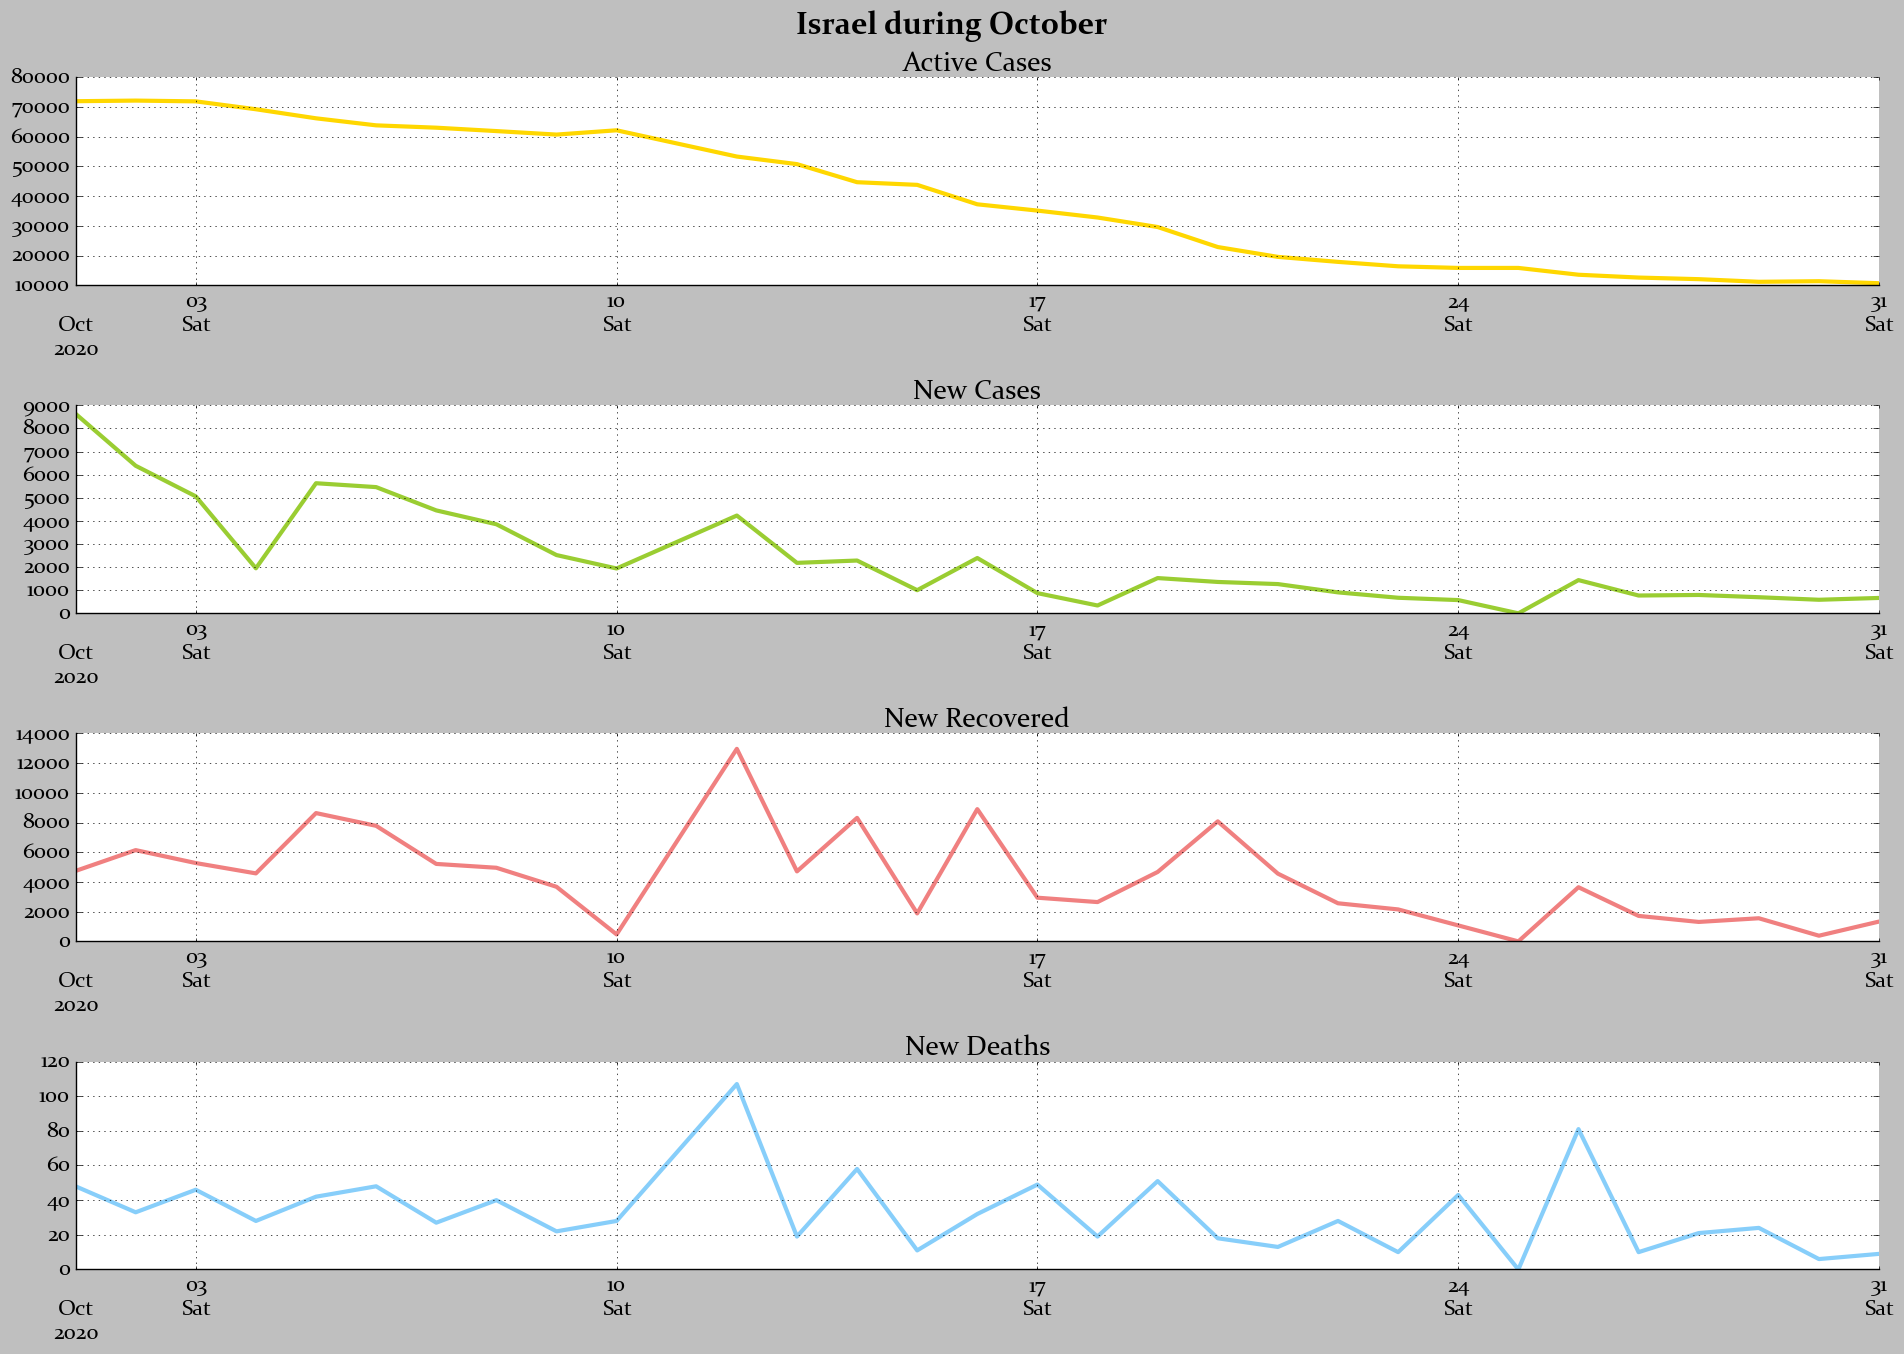

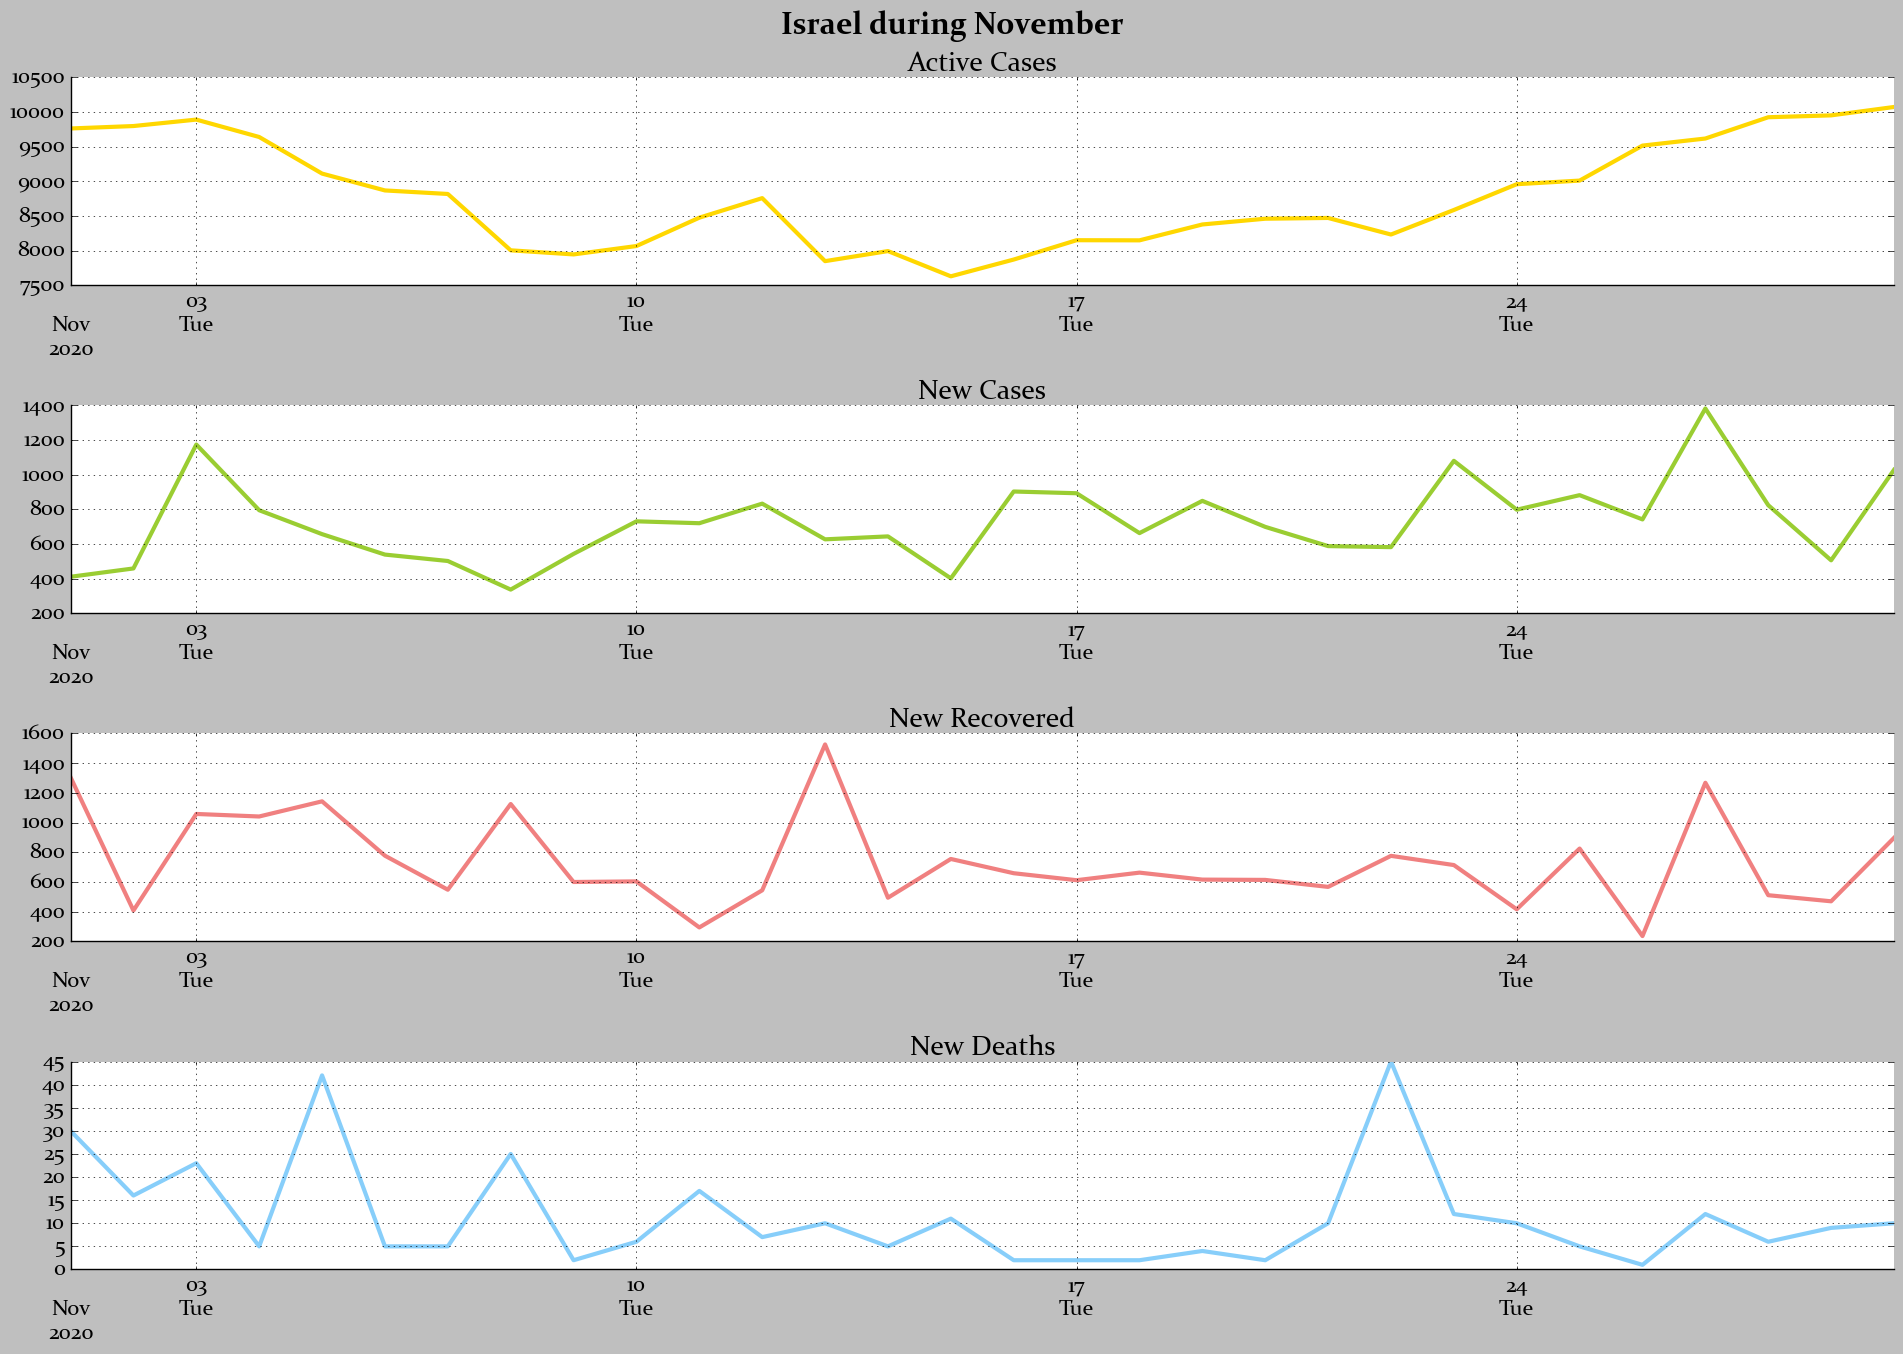

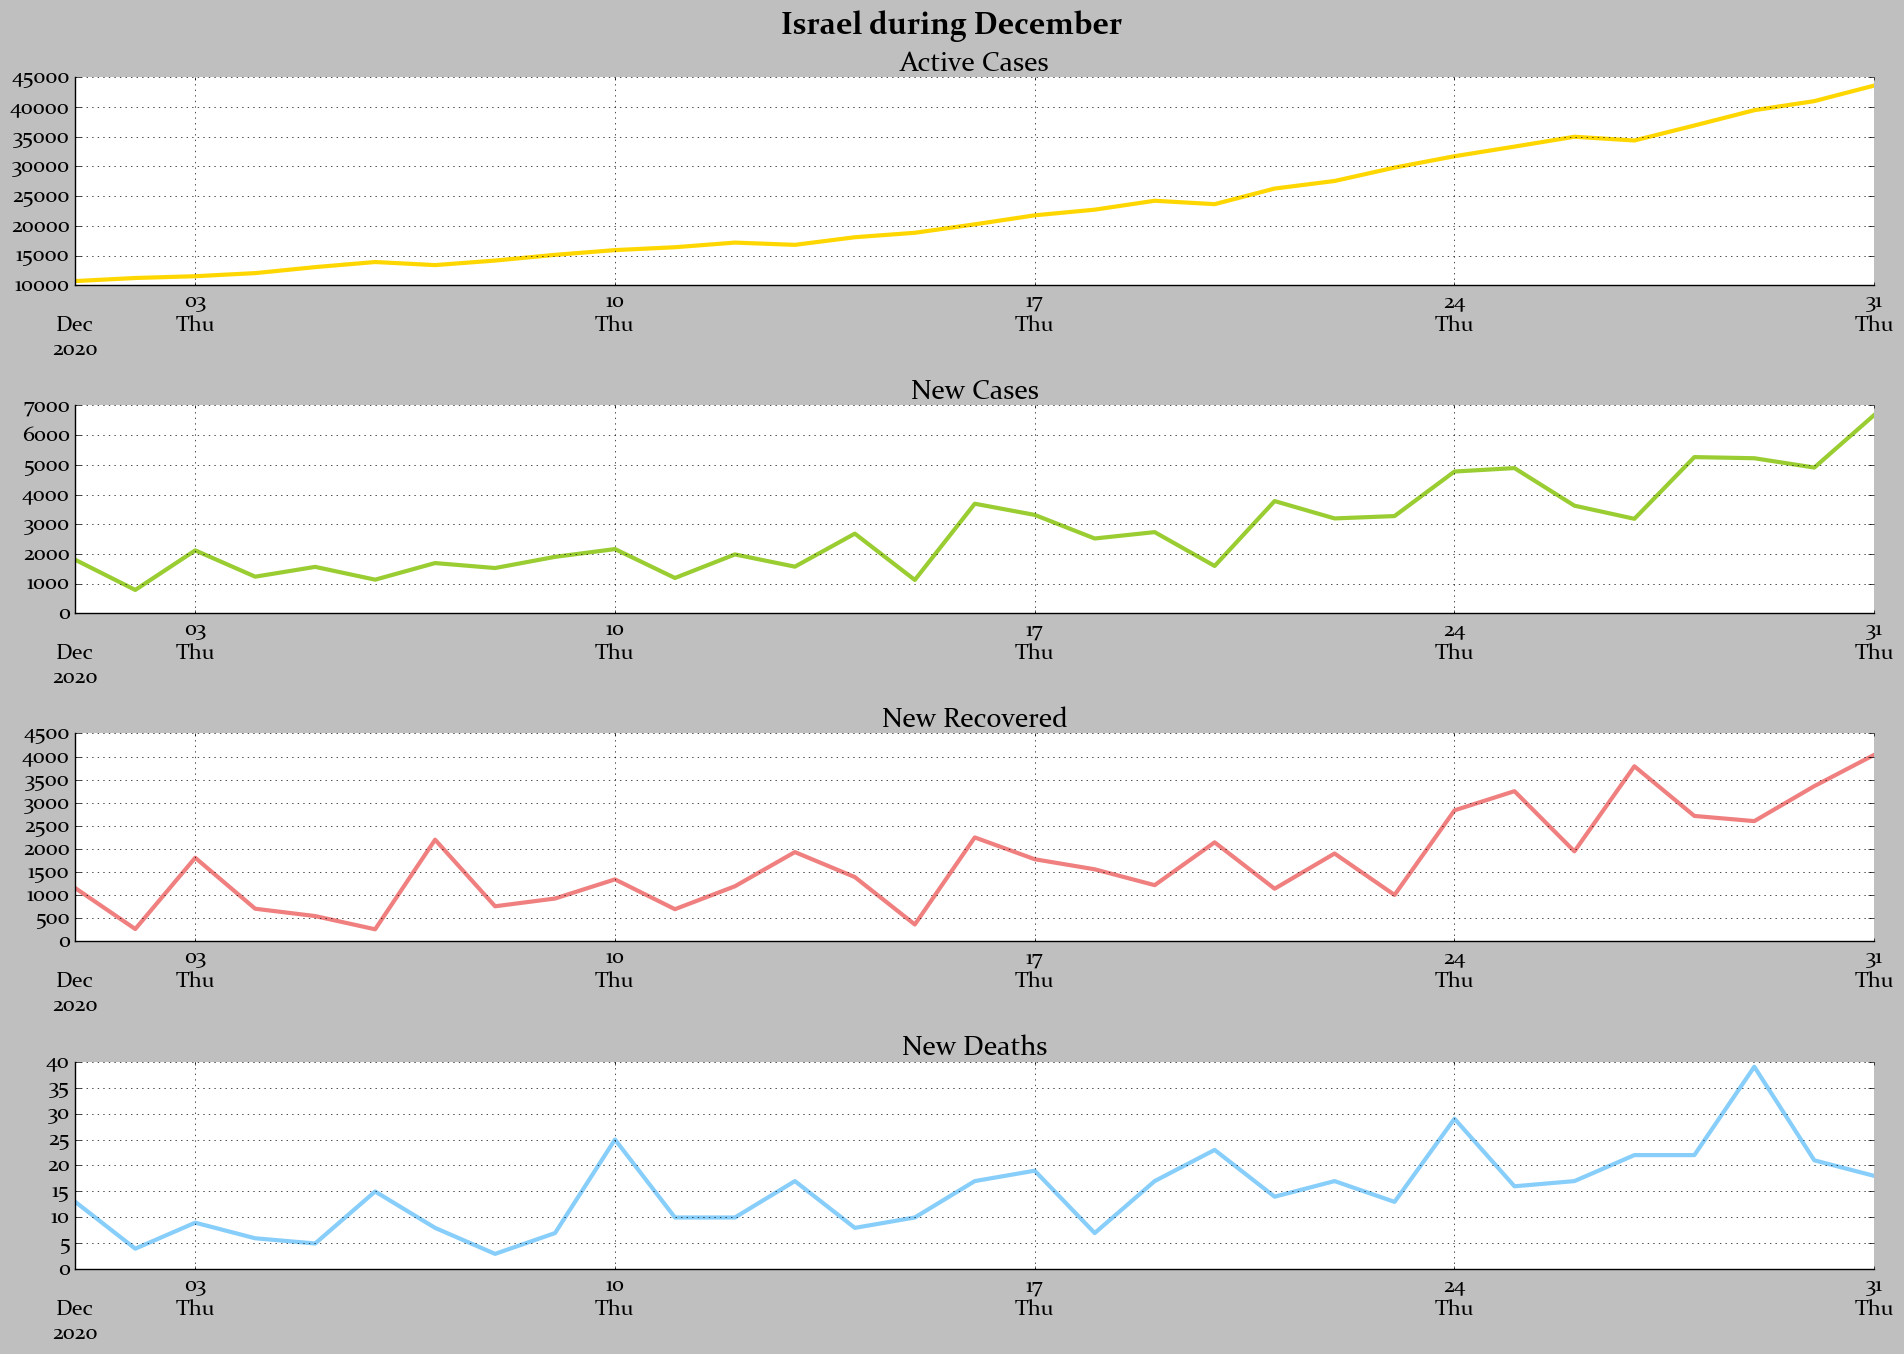

In [95]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [96]:
country.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
158        99.162%      0.838%
Total time taken in closed_cases_pie function is: 0.0024333333333333334 minutes.


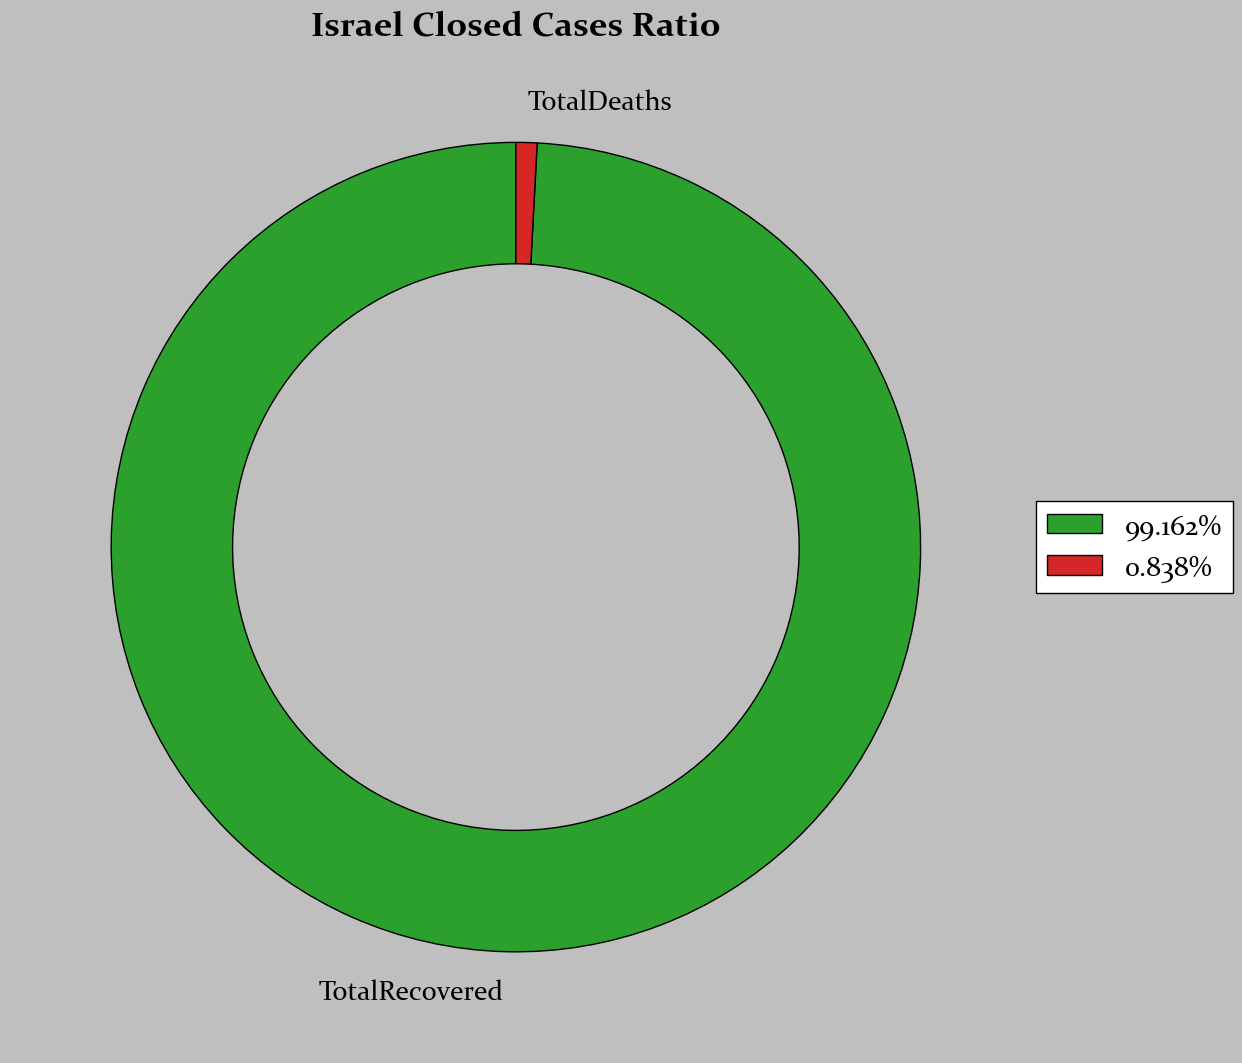

In [97]:
updated_totals = df[df['Date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [98]:
country.boxplot(['ActiveCases'], save=True)

In [99]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [100]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [101]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


,Date
42,2020-09-27


In [102]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'0.871%'